In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/processed/f1_2023_driver_performance.csv'
df = pd.read_csv(file_path, index_col='Driver')

print("Dataset loaded successfully:")
display(df.head())

Dataset loaded successfully:


,Team,AvgFinishingPosition,AvgGridPosition,TotalPoints,DNFs,ConsistencyStd,ChampionshipRank
Driver,,,,,,,
VER,Red Bull Racing,1.272727,3.181818,575.0,0,1.782752,1
PER,Red Bull Racing,5.863636,9.272727,285.0,3,1.841588,2
HAM,Mercedes,6.181818,6.090909,234.0,2,2.183471,3
LEC,Ferrari,8.227273,4.954545,206.0,5,1.501446,4
ALO,Aston Martin,6.636364,6.909091,206.0,2,1.993182,5


In [3]:
df_encoded = pd.get_dummies(df, columns=['Team'])

X = df_encoded.drop('ChampionshipRank', axis=1)
y = df_encoded['ChampionshipRank']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape of our training features after scaling:", X_train_scaled.shape)


Shape of our training features after scaling: (17, 15)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    
    Dense(16, activation='relu'),
    
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/Volumes/Fire/Driver Performance Analysis/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1 
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 202.5902 - val_loss: 214.0910
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 201.4208 - val_loss: 213.2704
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 200.2640 - val_loss: 212.4431
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 199.1162 - val_loss: 211.6018
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 197.9973 - val_loss: 210.7619
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 196.9195 - val_loss: 209.9288
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 195.8365 - val_loss: 209.0956
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 194.7636 - val_loss: 208.2602
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 193.6994 - val_loss: 207.4222
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 192.6554 - val_loss: 206.5814
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 191.6215 - val_loss: 205.7492
Epoch 12/100
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


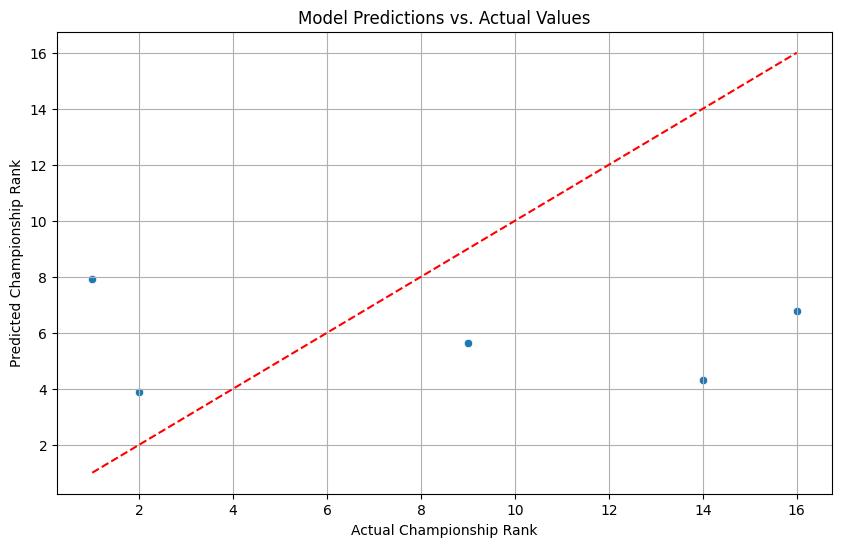

In [6]:
predictions = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Championship Rank")
plt.ylabel("Predicted Championship Rank")
plt.title("Model Predictions vs. Actual Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()